<a href="https://colab.research.google.com/github/Shalu31/30-days--30-project-in-AI/blob/main/braintumor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

model = VGG16(weights='imagenet',include_top=True,input_shape = (224,224,3))


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [2]:
img_path = '/content/microphone.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [3]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


In [4]:
pred

array([[2.12951218e-05, 1.12986381e-05, 7.72931890e-06, 4.93516245e-06,
        6.67929316e-06, 7.29889216e-05, 1.11898032e-06, 1.22537006e-06,
        1.56440490e-06, 2.48762376e-06, 2.07802277e-05, 4.40799777e-05,
        1.34121947e-05, 3.68285305e-06, 1.40553357e-05, 3.40722545e-06,
        2.75490784e-05, 3.28492865e-06, 7.10289987e-06, 3.38977115e-05,
        3.43515717e-06, 4.99531088e-05, 2.31076574e-05, 1.39943595e-05,
        6.33413083e-06, 1.20552431e-05, 3.49220636e-06, 3.30386410e-06,
        3.11680196e-05, 4.21321647e-06, 4.00005956e-06, 2.67299538e-06,
        1.32627783e-05, 3.18268903e-05, 4.80308699e-05, 2.13377393e-06,
        3.41099512e-05, 1.52061625e-06, 8.97331338e-05, 4.82104633e-06,
        2.41721182e-06, 5.22011214e-06, 2.93229755e-06, 3.14475915e-06,
        4.56740554e-06, 3.28461581e-04, 1.62449442e-06, 1.13007945e-05,
        2.88945307e-06, 1.27358555e-06, 1.88407455e-06, 5.99657142e-06,
        3.50303526e-05, 1.16320480e-04, 8.19273100e-06, 3.758371

In [5]:
decode_preds = decode_predictions(pred,top=5)[0]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
for pred in decode_preds:
  print(pred[1],':',pred[2])

microphone : 0.4518064
thimble : 0.08251399
whistle : 0.042193003
face_powder : 0.0344994
screw : 0.029330557


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Datadir = r"/content/drive/MyDrive/Tumour"

In [10]:
traindir = "/content/drive/MyDrive/Tumour/train"

In [11]:
CATEGORIES = ['glioma','meningioma','no_tumor','pituitary']

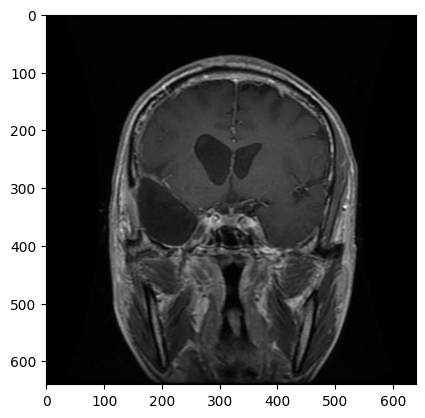

In [12]:
for i in CATEGORIES:
  path = os.path.join(traindir,i) # Use traindir instead of Datadir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

In [15]:
img_size = 200

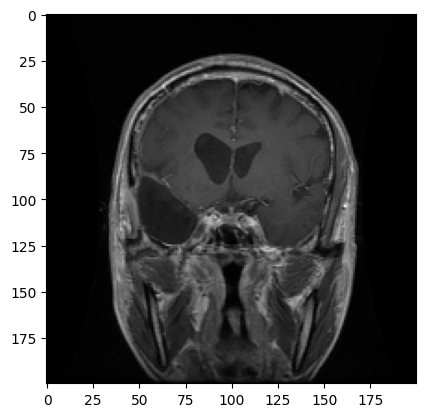

In [16]:
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [17]:
training_data = []



In [21]:
def create_training_data():
  for i in CATEGORIES:
    path = os.path.join(traindir,i)
    class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

In [22]:
create_training_data()

In [23]:
print(len(training_data))

1695


In [25]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 3, 4, 4],
       [0, 0, 1, ..., 2, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 3]
[array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 2, 2, 2],
       [2, 3, 2, ..., 4, 4, 4],
       ...,
       [2, 3, 3, ..., 4, 2, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 3]
[array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8), 2]
[array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 2, ..., 2, 3, 3],
       ...,

In [26]:
X = []
Y= []

In [27]:
for features,label in training_data:
  X.append(features)
  Y.append(label)

In [28]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [29]:
y = np.array(Y)

In [30]:
X = np.array(X).reshape(-1,img_size,img_size,1)

In [31]:
validation_data = []

In [39]:
valdir = '/content/drive/MyDrive/Tumour/valid'

In [40]:
def create_validation_data():
  for i in CATEGORIES:
    path = os.path.join(valdir,i)
    class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        validation_data.append([new_array,class_num])
      except Exception as e:
        pass

In [41]:
create_validation_data()
print(len(validation_data))

502


In [42]:
import random
random.shuffle(validation_data)
for sample in training_data[:10]:
  print(sample)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 3, 4, 4],
       [0, 0, 1, ..., 2, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 3]
[array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 2, 2, 2],
       [2, 3, 2, ..., 4, 4, 4],
       ...,
       [2, 3, 3, ..., 4, 2, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 3]
[array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8), 2]
[array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 2, ..., 2, 3, 3],
       ...,

In [46]:
X_val = []
Y_val= []

In [47]:
for features,label in validation_data:
  X_val.append(features)
  Y_val.append(label)

In [49]:
Y_val = np.array(Y_val)
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)

In [50]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle


In [60]:
X = np.array(X).reshape(-1,img_size,img_size,1)
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)

X = X/255.0
X_val = X_val/255.0

In [61]:
X.shape

(502, 200, 200, 1)

In [62]:
X_val.shape

(502, 200, 200, 1)

In [63]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 198, 198, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 97, 97, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 97, 97, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     8,667,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,036,929 (34.47 MB)

 Trainable params: 9,036,929 (34.47 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.fit(X,y,batch_size=32,epochs=10,validation_data=(X_val,Y_val))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 502
'y' sizes: 1695


In [68]:
# Save the trained model
model.save('brain_tumor_model.h5')
print("Model saved as brain_tumor_model.h5")

Model saved as brain_tumor_model.h5


In [69]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, Y_val, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.6931
Validation Accuracy: 0.2470
